In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read Dataset

In [3]:

movie_data = pd.read_csv("/content/drive/MyDrive/selection-problems-main/data/p1_movie_metadata.csv")
movie_data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


Dataset info

In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Checking with there is any missing values or not

In [5]:
movie_data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Here the missing data from the previously selected observation is replaced with the existing ones from the observation having all the data available.
Finally, the process continues until there is no more missing information

In [6]:
def random_sample_imputation(df):
  cols_with_missing_values = df.columns[df.isna().any()].tolist()

  for var in cols_with_missing_values:
    # extract a random sample
    random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                  random_state=0)
    # re-index the randomly extracted sample
    random_sample_df.index = df[
            df[var].isnull()].index

    # replace the NA
    df.loc[df[var].isnull(), var] = random_sample_df
  return df


df = movie_data.copy()
movie_data_df = random_sample_imputation(movie_data)
movie_data_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,9.0,90.0,131.0,826.0,Rob Walker,131.0,8373585.0,Documentary,...,185.0,English,China,R,12000000.0,2009.0,12.0,7.1,1.85,0


No more missing data

In [7]:
movie_data.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Numerical and Categorical columns seperation

In [8]:
numerical_columns = list(movie_data.columns[movie_data.dtypes!='object'])
categorical_columns = list(movie_data.columns[movie_data.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
Categorical Columns : ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


Numerical Columns Description

In [9]:
movie_data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,5043.0,1.401509e+02,1.216220e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5043.0,1.071747e+02,2.518175e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,5043.0,6.888404e+02,2.814312e+03,0.00,7.00,49.00,194.00,2.300000e+04
actor_3_facebook_likes,5043.0,6.443908e+02,1.661762e+03,0.00,133.00,372.00,636.00,2.300000e+04
actor_1_facebook_likes,5043.0,6.554923e+03,1.501194e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,5043.0,4.833760e+07,6.805013e+07,162.00,5132222.00,25277561.00,62673770.00,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5043.0,1.370613e+00,2.011585e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5043.0,2.722810e+02,3.773973e+02,1.00,65.00,156.00,324.00,5.060000e+03


In [10]:
# Extract numerical columns
numerical_columns = movie_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize numerical categories
movie_data[numerical_columns] = scaler.fit_transform(movie_data[numerical_columns])


Categorical Columns Description

In [11]:
movie_data[categorical_columns].describe().T

,count,unique,top,freq
color,5043,2,Color,4834
director_name,5043,2398,Steven Spielberg,28
actor_2_name,5043,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5043,2097,Robert De Niro,49
movie_title,5043,4917,Pan,3
actor_3_name,5043,3521,Ben Mendelsohn,8
plot_keywords,5043,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,3
language,5043,46,English,4718


All unique values in dataset

In [12]:
movie_data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

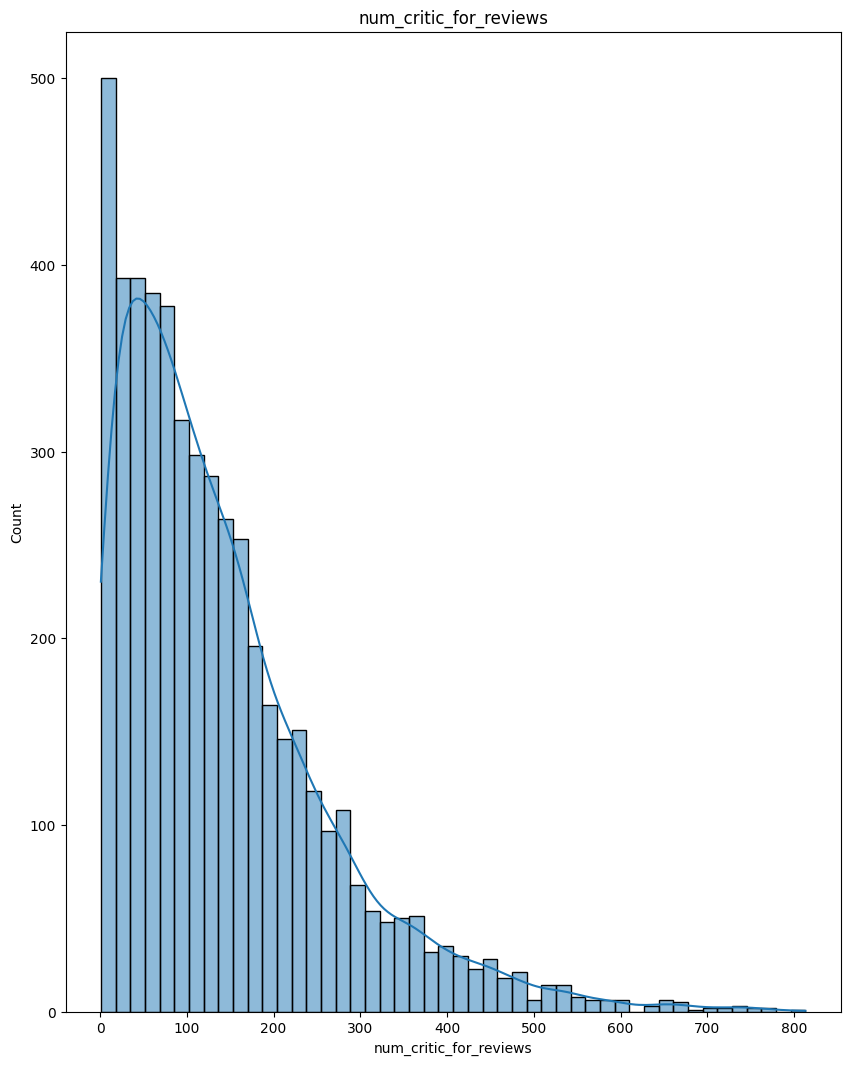

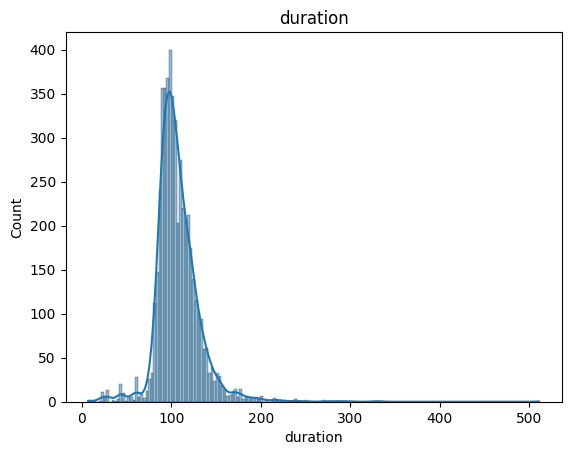

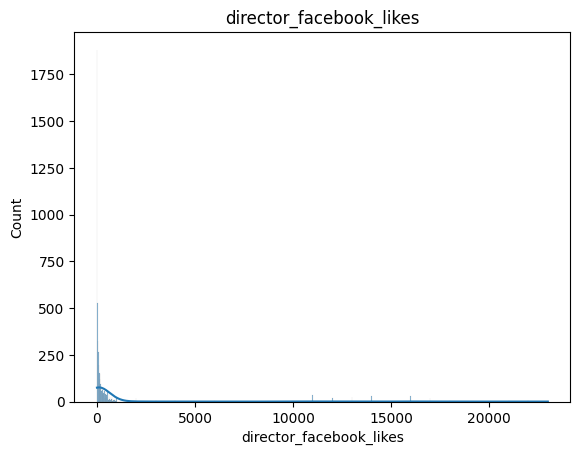

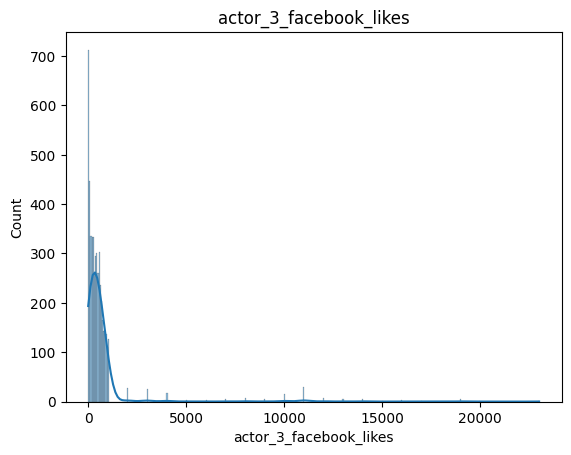

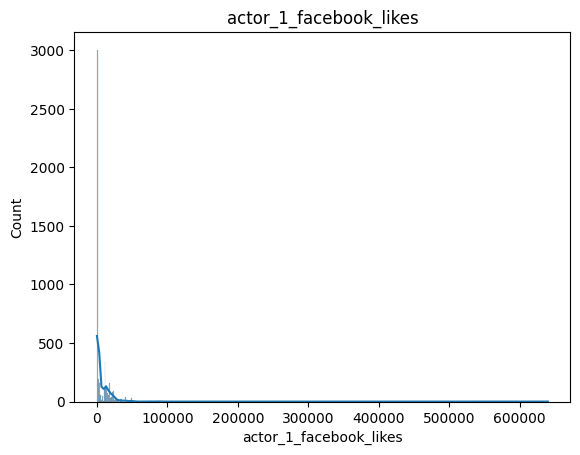

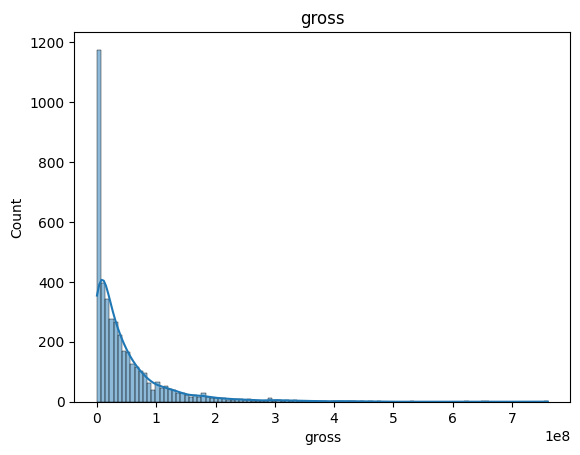

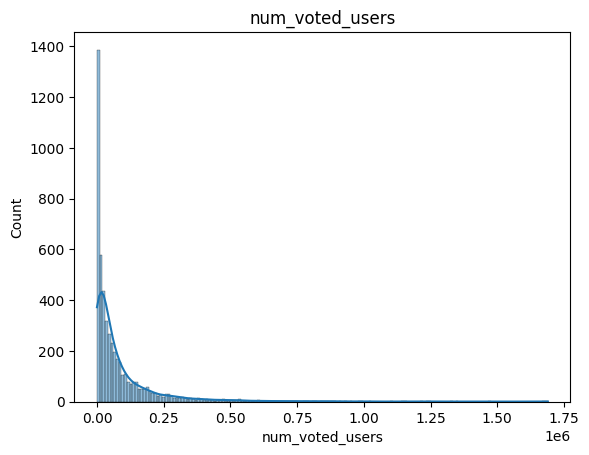

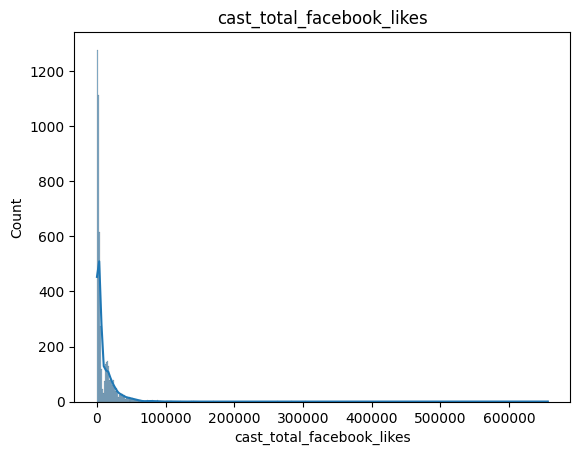

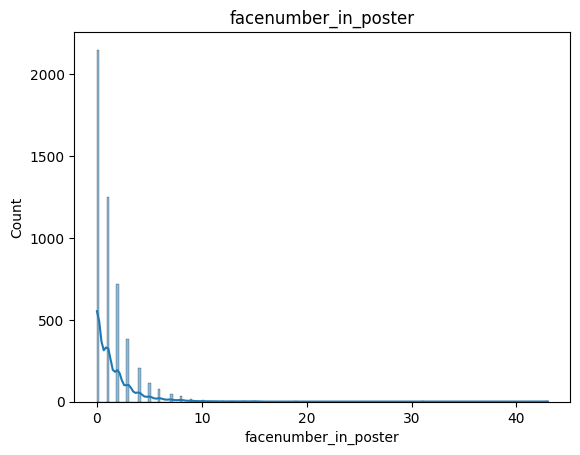

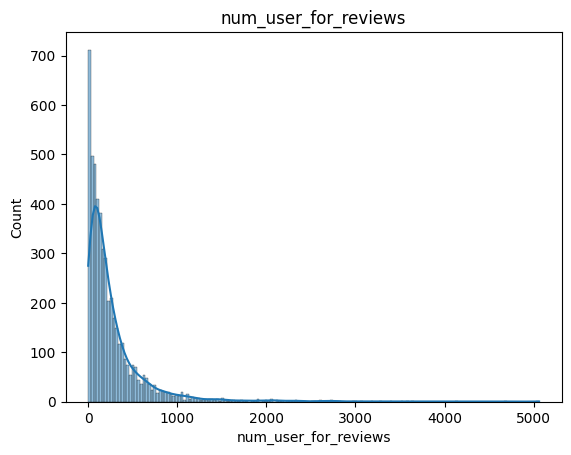

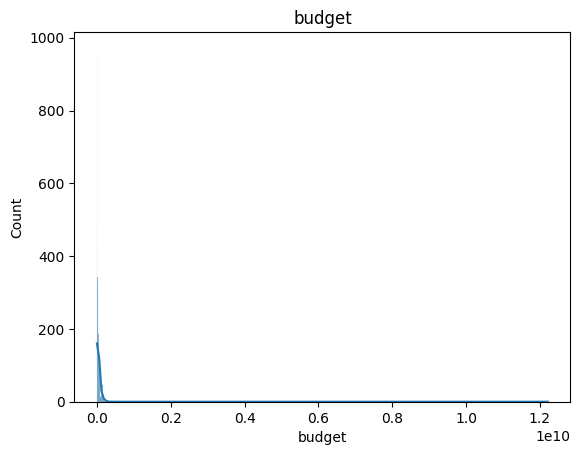

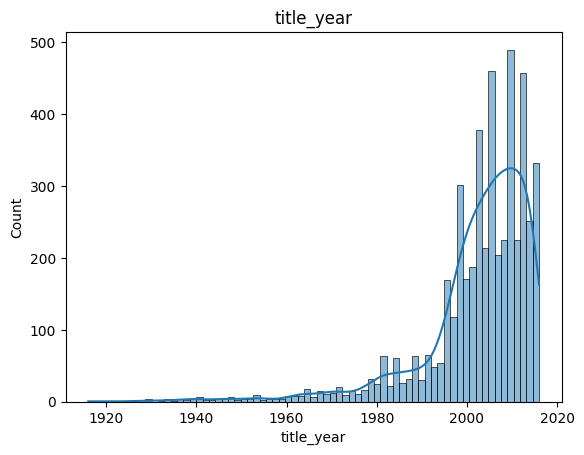

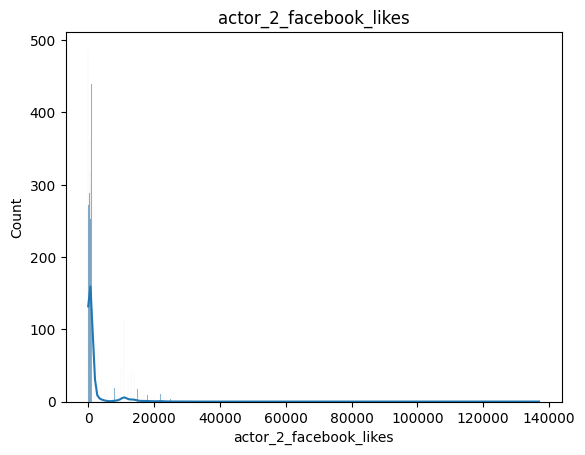

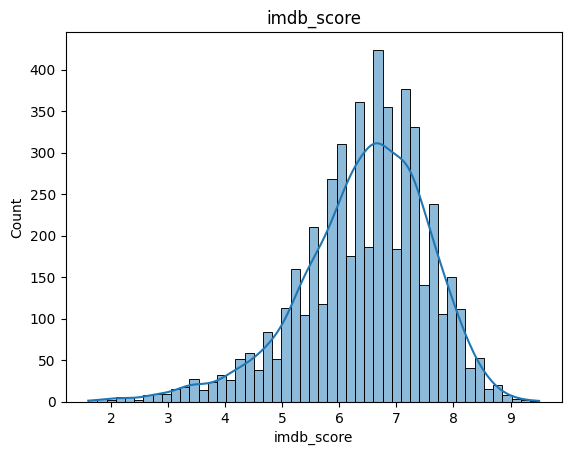

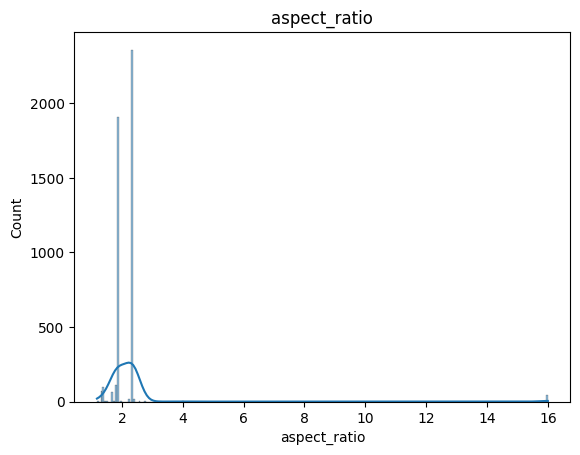

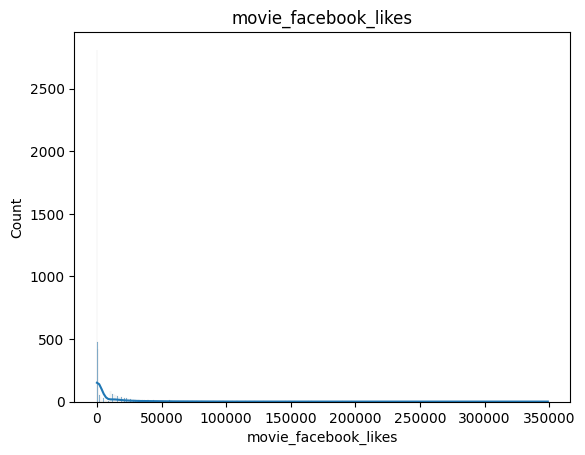

In [13]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

Correlation heatmap

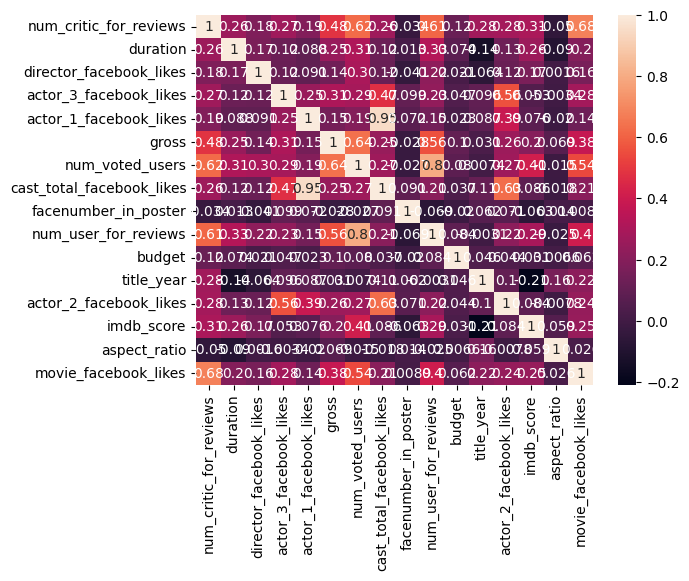

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()


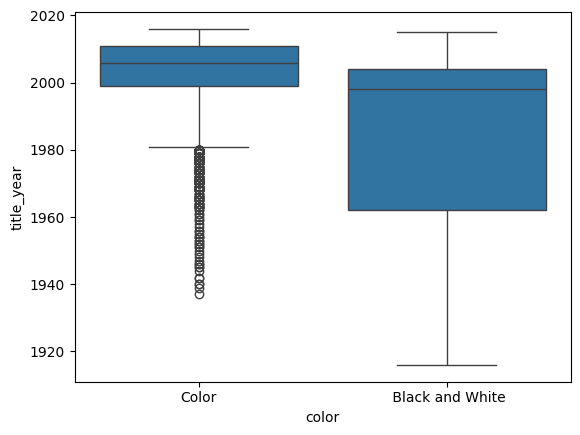

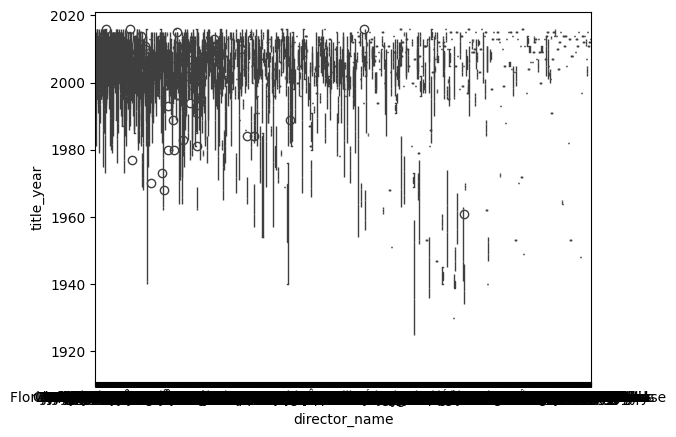

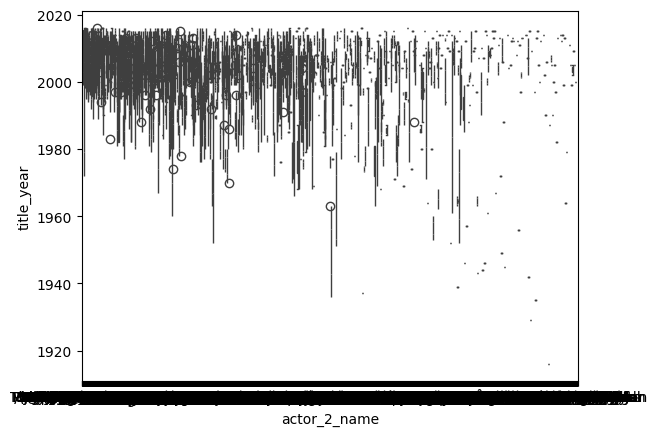

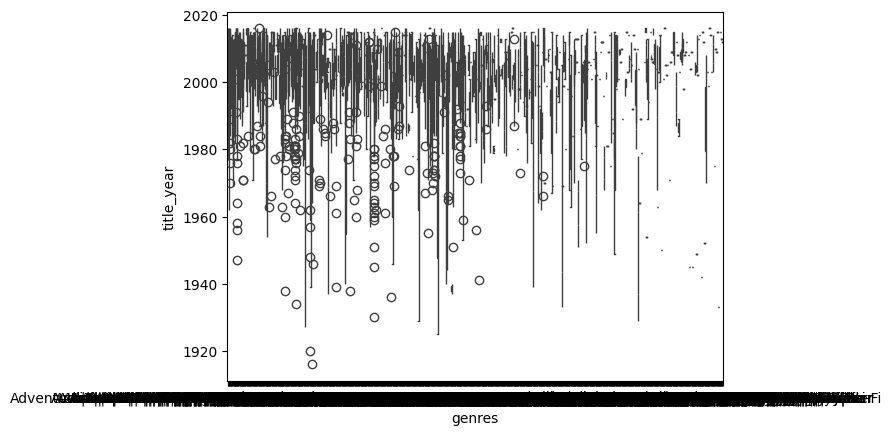

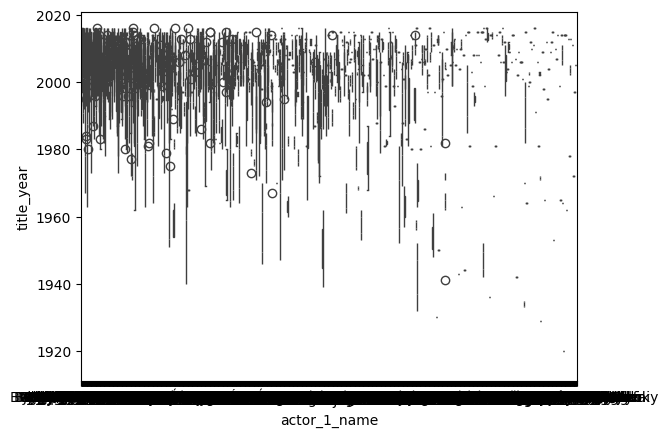

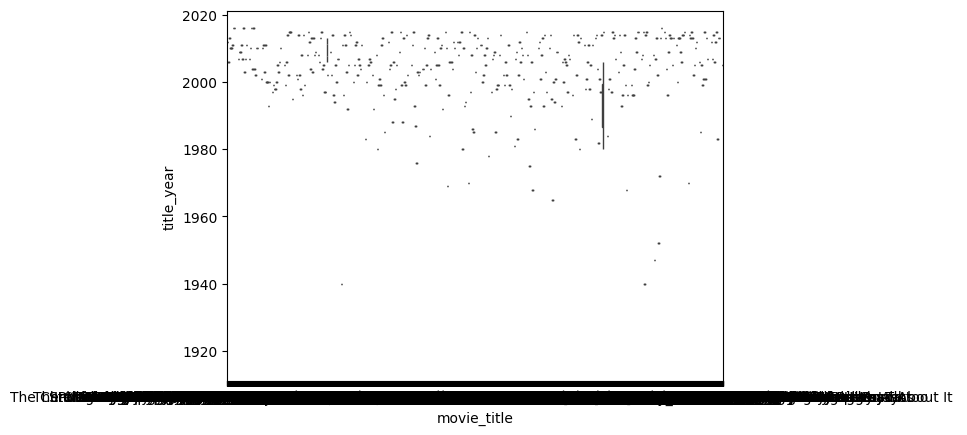

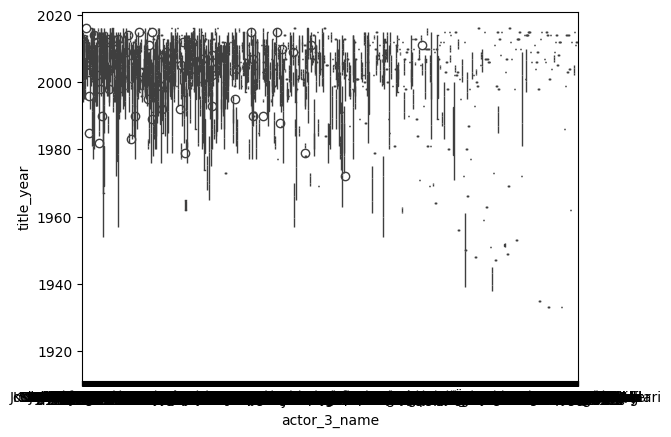

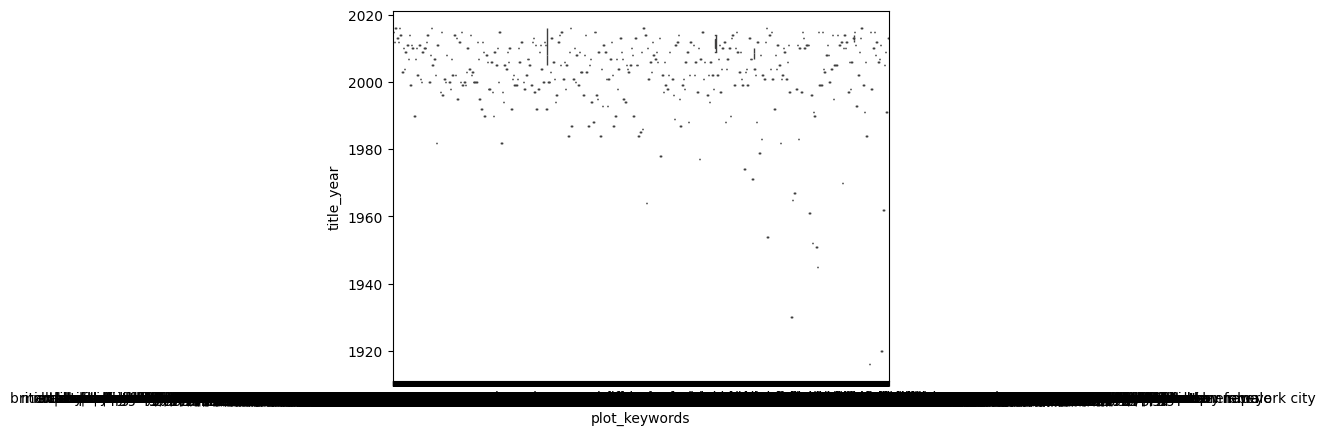

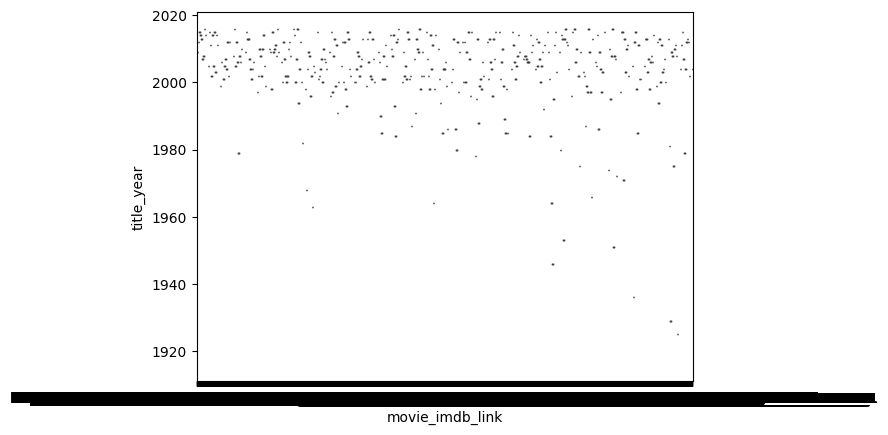

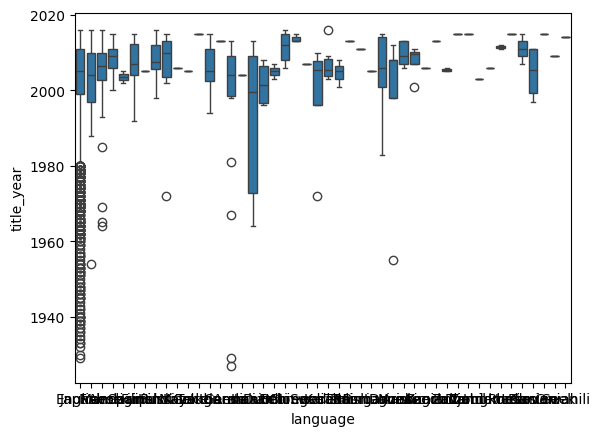

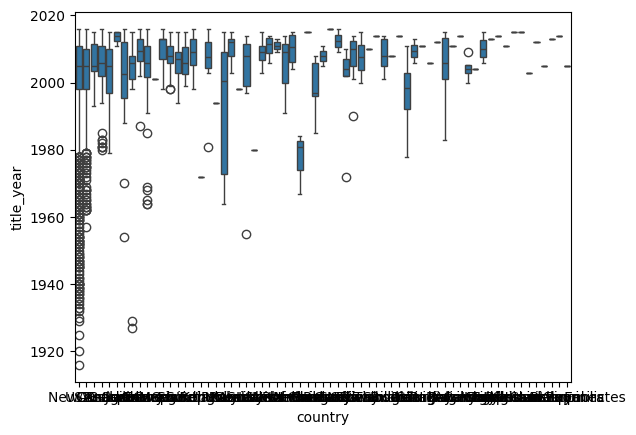

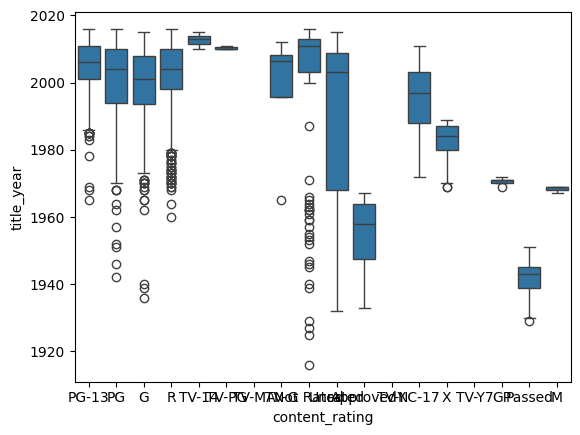

In [15]:
for i in categorical_columns:
    sns.boxplot(data=df, x=i , y='title_year')
    plt.show()

**Creating Mapper for each categorical variable**

In [16]:
def convert_names(df,column_name):

  names = df[column_name].values.tolist()
  # Create a dictionary to store unique names and their corresponding floating point values
  unique_values = {}

  # Assign unique floating point values to each unique name
  current_value = 0.0
  for name in names:
      if name not in unique_values:
          unique_values[name] = current_value
          current_value += 1.0
  # Get the unique floating point values for each name
  unique_float_values = np.array([unique_values[name] for name in names])
  dict_data = dict(zip(names, unique_float_values))
  #print(dict_data)
  return dict_data

**Applying the mapper to the dataframe**

In [17]:
for x in categorical_columns:
  movie_data[x] = movie_data[x].replace(convert_names(movie_data,x))

In [18]:
movie_data.info()
print(len(movie_data))
print(movie_data['genres'].isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   float64
 1   director_name              5043 non-null   float64
 2   num_critic_for_reviews     5043 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    5043 non-null   float64
 5   actor_3_facebook_likes     5043 non-null   float64
 6   actor_2_name               5043 non-null   float64
 7   actor_1_facebook_likes     5043 non-null   float64
 8   gross                      5043 non-null   float64
 9   genres                     5043 non-null   float64
 10  actor_1_name               5043 non-null   float64
 11  movie_title                5043 non-null   float64
 12  num_voted_users            5043 non-null   float64
 13  cast_total_facebook_likes  5043 non-null   float

 **Mutual Information Scores**

In [19]:
X = movie_data.drop(labels=['title_year'],axis=1)
Y = movie_data[['title_year']]
print(Y)

      title_year
0       0.522063
1       0.362313
2       1.001314
3       0.761689
4       0.522063
...          ...
5038    0.841564
5039   -5.149072
5040    0.841564
5041    0.761689
5042    0.122687

[5043 rows x 1 columns]


In [20]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)


In [21]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

num_critic_for_reviews       0.169704
content_rating               0.141946
movie_facebook_likes         0.139041
movie_imdb_link              0.131551
movie_title                  0.131280
plot_keywords                0.123419
budget                       0.101945
actor_3_name                 0.099673
aspect_ratio                 0.096695
actor_2_name                 0.086242
num_voted_users              0.074827
cast_total_facebook_likes    0.068574
actor_1_name                 0.063075
num_user_for_reviews         0.062151
genres                       0.057634
actor_3_facebook_likes       0.054215
actor_2_facebook_likes       0.047081
actor_1_facebook_likes       0.040369
color                        0.038760
imdb_score                   0.036600
director_name                0.033996
gross                        0.026046
language                     0.022445
duration                     0.021457
country                      0.017368
facenumber_in_poster         0.016814
director_fac

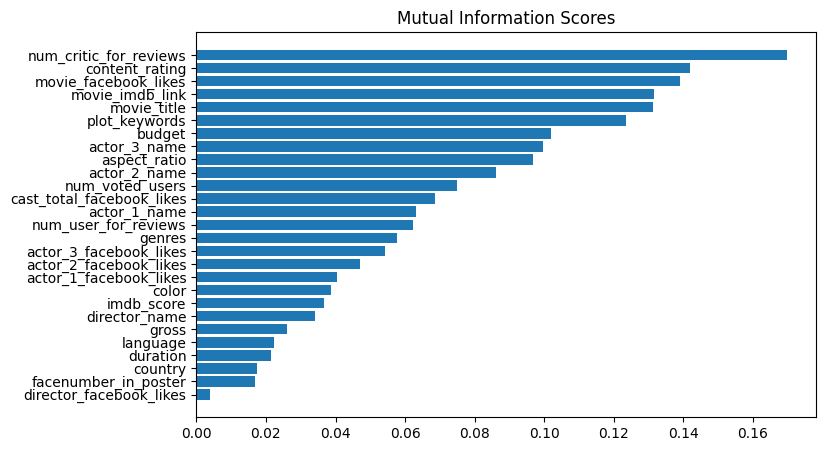

In [22]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


**Model Training Baseline Models**

In [23]:

#Create an Evaluate Function to give all metrics after model Training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square



**Training Various models**

In [24]:
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

**Introducing a new feature 'time_since_last_release'**

In [25]:
# Step 1: Group by 'director_name'
grouped = movie_data.groupby('director_name')

# Step 2: Sort by 'title_year' within each group
df_sorted = movie_data.sort_values(by='title_year')

# Step 6: Shift 'title_year' by one row within each group to get the release year of the previous movie
df_sorted.loc[:,'last_movie_release'] = grouped['title_year'].shift(1)

# Step 7: Calculate time since the last release
df_sorted.loc[:,'time_since_last_release'] = df_sorted['title_year'] - df_sorted['last_movie_release']

# Step 8: Merge calculated features back to the original DataFrame
df_with_features = pd.merge(movie_data, df_sorted[['director_name', 'title_year', 'time_since_last_release',]],
                             on=['director_name', 'title_year'],how='left')


y = df_with_features['time_since_last_release']
# Impute missing values in the target column 'title_year'
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Replace original 'title_year' column with imputed values
df_with_features.loc[:, 'time_since_last_release'] = y_imputed
print(df_with_features.info())
#print(df_with_features.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5491 non-null   float64
 1   director_name              5491 non-null   float64
 2   num_critic_for_reviews     5491 non-null   float64
 3   duration                   5491 non-null   float64
 4   director_facebook_likes    5491 non-null   float64
 5   actor_3_facebook_likes     5491 non-null   float64
 6   actor_2_name               5491 non-null   float64
 7   actor_1_facebook_likes     5491 non-null   float64
 8   gross                      5491 non-null   float64
 9   genres                     5491 non-null   float64
 10  actor_1_name               5491 non-null   float64
 11  movie_title                5491 non-null   float64
 12  num_voted_users            5491 non-null   float64
 13  cast_total_facebook_likes  5491 non-null   float

**Mutual information and correlation matrix, concluded that the below features are to be selected to the given problem**

In [26]:
columns_of_interest = ['director_name','num_critic_for_reviews','content_rating','genres','time_since_last_release','title_year']

subset_df = df_with_features[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_with_features.corr()
print(correlation_matrix)

                              color  director_name  num_critic_for_reviews  \
color                      1.000000       0.066167               -0.012390   
director_name              0.066167       1.000000               -0.413098   
num_critic_for_reviews    -0.012390      -0.413098                1.000000   
duration                   0.044852      -0.257615                0.262379   
director_facebook_likes    0.043542      -0.173883                0.178122   
actor_3_facebook_likes    -0.033067      -0.192394                0.276506   
actor_2_name               0.111964       0.677886               -0.377115   
actor_1_facebook_likes    -0.039305      -0.186067                0.197605   
gross                     -0.044220      -0.332218                0.422128   
genres                     0.079806       0.299590               -0.199501   
actor_1_name               0.114819       0.638872               -0.358601   
movie_title                0.096821       0.793586              

In [27]:
from sklearn.model_selection import train_test_split
#columns_of_interest = ['director_name','num_critic_for_reviews','content_rating','genres','time_since_last_release','title_year']

#subset_df = df_with_features[columns_of_interest]
X = df_with_features.drop(columns=['title_year'],axis =1)
Y = df_with_features['title_year']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)


In [28]:
print(len(xtrain),len(xtest))

3843 1648


In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "SVM Regressor" : SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain.values.flatten()) # Train model

    # Make predictions
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7475
- Mean Absolute Error: 0.5212
- R2 Score: 0.4493
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7299
- Mean Absolute Error: 0.5101
- R2 Score: 0.4436


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9648
- Mean Absolute Error: 0.6788
- R2 Score: 0.0826
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9331
- Mean Absolute Error: 0.6667
- R2 Score: 0.0907


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7475
- Mean Absolute Error: 0.5211
- R2 Score: 0.4493
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7299
- Mean Absolute Error: 0.5101
- R2 Score: 0.4437


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8342
- Mean Absolute Error: 0.5660
- R2 Score: 0.3143
-----------------------

**Hyperparameter Tuning for Random Forest Regressor using Grid Search**

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X, Y)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best R2 Score:", best_score)